In [51]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy import integrate
from scipy.optimize import fsolve
from IPython.display import IFrame
import matplotlib.animation as anim

In [40]:
N = 2001
t = np.linspace(0.,30.,N)

r=np.zeros(len(t))
theta=np.zeros(len(t))

r[0]=15.
theta[0]=np.pi/8
r0=np.array([15,np.pi/8,0.,0.])
vr=np.zeros(len(t))
vtheta=np.zeros(len(t))


r[1]=15.
theta[1]=np.pi/8
vr[1]=0.
vtheta[1]=0.

v0=np.array([[0.],[0.]])
M=np.array([[0,-1],[1,0]])
vl0_=1*np.dot(M,v0)

vr[0]=v0[0,0]
vtheta[0]=v0[1,0]

r0=np.array([[15.],[np.pi/8]])
M=np.array([[0,-1],[1,0]])
rl0_=1*np.dot(M,v0)

r[0]=r0[0,0]
theta[0]=r0[1,0]

h=0.015

In [41]:
k=5.
l=3.
m=2.
g=9.8
w=k/l

In [42]:
def ar(r,theta, vtheta):
    return w*(l-r) + g*np.cos(theta)+r*pow(vtheta,2)
    

def at(r,theta,vr,vtheta):
    return -((g/r)*np.sin(theta)+(2/r)*vr*vtheta)

In [43]:
for i in range(2,len(t)):
    r[i]=r[i-1]+h*vr[i-1]+(1/6)*(4*ar(r[i-1],theta[i-1],vtheta[i-1])-ar(r[i-2],theta[i-2],vtheta[i-2]))*pow(h,2)
    theta[i]=theta[i-1]+h*vtheta[i-1]+(1/6)*(4*at(r[i-1],theta[i-1],vr[i-1],vtheta[i-1])-at(r[i-2],theta[i-2],vr[i-2],vtheta[i-2]))*pow(h,2)
    
    vr[i]=vr[i-1]+(1/2)*(3*ar(r[i-1],theta[i-1],vtheta[i-1])-ar(r[i-2],theta[i-2],vtheta[i-2]))*h
    vtheta[i]=vtheta[i-1]+(1/2)*(3*at(r[i-1],theta[i-1],vr[i-1],vtheta[i-1])-at(r[i-2],theta[i-2],vr[-1],vtheta[i-2]))*h

In [55]:
x=r*np.cos(theta-(np.pi/2))
y=r*np.sin(theta-(np.pi/2))

vx = vr*np.cos(theta-(np.pi/2))
vy = vr*np.sin(theta-(np.pi/2))

In [47]:
X_reducido = []
Y_reducido = []
value = 20
reduce = []
for i in range(len(t)):
    if i%value == 0:
        reduce.append(t[i])
        X_reducido.append(x[i])
        Y_reducido.append(y[i])

<IPython.core.display.Javascript object>


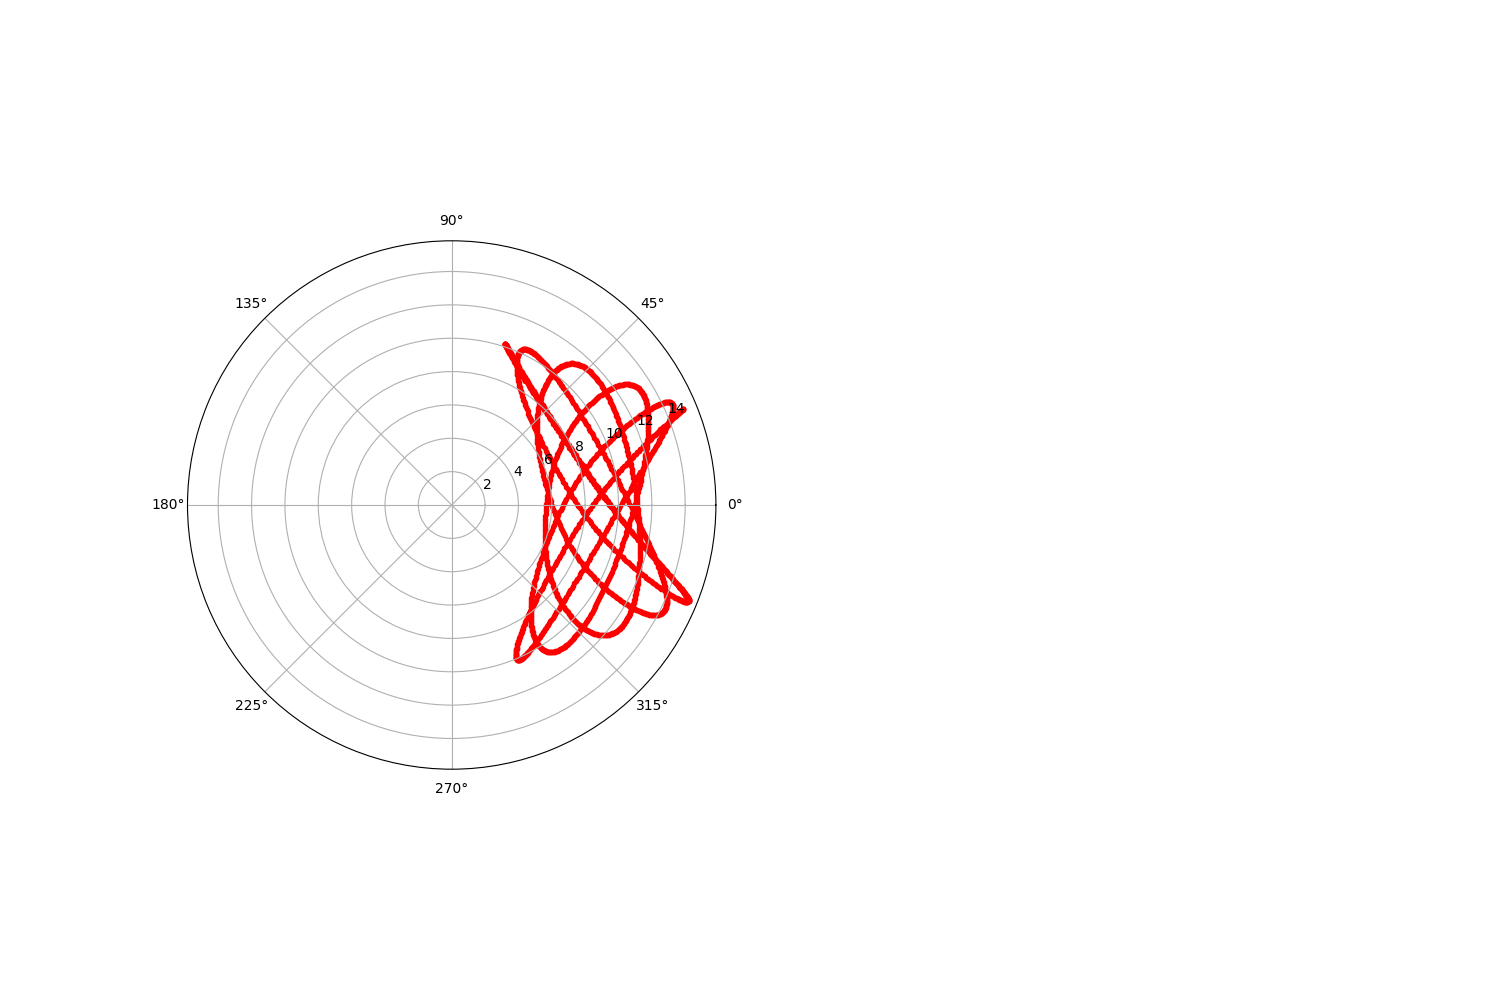

In [53]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(121,projection='polar')
ax1.scatter(theta,r,marker='.',color='r')

<IPython.core.display.Javascript object>


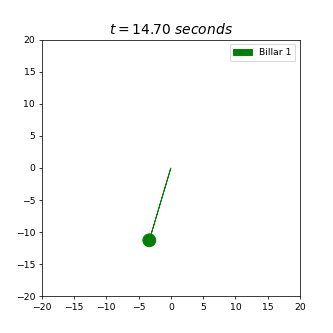

In [58]:
Limits = np.array([20.,20.])

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)


def init():
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])

def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(reduce[i]), fontsize=15)

    x1 = X_reducido[i]
    y1 = Y_reducido[i]

    #vx = esferas_solidas[0].GetRVelocityVector()[i,0]
    #vy = esferas_solidas[0].GetRVelocityVector()[i,1]

    
    circle1 = plt.Circle((x1,y1), 1, color='green', fill=True )
    plot = ax.add_patch(circle1)

    
    plot = ax.arrow(0,0,x1,y1,color='green',head_width=0.5, label = "Billar 1")

    ax.legend()

    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(reduce),init_func=init)


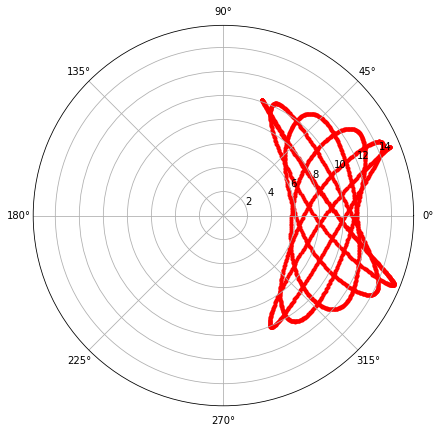